<h1> 1. Wstęp </h1>
<p> Poniższa praca dotyczy rozwiązania problemu <b>Numberlink</b> za pomocą różnych algorytmów. Numberlink to gra logiczna, która polega na połączeniu ze sobą liczb, wdług następujących zasad: 
<ul>
    <li>Każdy numer jest połączony ze swoim odpowiednikiem za pomocą ciągłych ścieżek 
    <li>Scieżka nie może się przecinać z inną 
    <li>Nie można przechodzić na ukos
    <li>Ta sama ścieżka nie może przechodzić koło siebie
    <li>Wszystkie pola muszą być zapełnione
</ul>
Zagadki są rozwiązywane na kwadratowych planszach. Istnieje tylko jedno rozwiązanie każdego przykładu.
<p>

<h1> 2. Instancje problemów do rozwiązania </h1>
<p> Algorytm genetyczny będzie testowany na 9 rozwiązaniech,
<ul>
<li>3 małych - (plansza 5x5),
<li>3 średnich - (plansza 8x8),
<li> 3 dużych - (plansza 11x11),
</ul>

In [10]:
"""
PRZYPADKI MAŁEJ WIELKOŚCI:

"-" reprezentuje puste pole, liczby 0,1,.... to punkty które trzeba połączyć
pod przykładem jest prezentowane idealne rozwiązanie jako ciąg liczb
Przykład 5x5_1:
"""

plansza_5x5_1 = [
    ["-","-","-","-","-"],
    ["-","1","-","-","-"],
    ["-","-","2","-","-"],
    ["-","-","1","-","-"],
    ["0","2","0","-","-"],
]

idealne_5x5_1 = [
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,2,2,1,0],
    [0,2,1,1,0],
    [0,2,0,0,0]
]

"""
Przykład 5x5_2:
"""

plansza_5x5_2 = [
    ["-","-","-","-","-"],
    ["-","-","-","-","0"],
    ["-","-","2","-","1"],
    ["-","-","-","-","2"],
    ["0","-","-","-","1"],
]

idealne_5x5_2 = [
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,1,2,1,1],
    [0,1,2,2,2],
    [0,1,1,1,1]
]
"""
Przykład 5x5_3:
"""

plansza_5x5_3 = [
    ["0","-","1","-","2"],
    ["1","-","0","-","-"],
    ["-","-","-","-","-"],
    ["3","-","-","3","-"],
    ["2","-","-","-","-"],
]

idealne_5x5_3 = [
    [0,0,1,1,2],
    [1,0,0,1,2],
    [1,1,1,1,2],
    [3,3,3,3,2],
    [2,2,2,2,2]
]

In [11]:
"""
PRZYPADKI ŚREDNIEJ WIELKOŚCI:

"-" reprezentuje puste pole, liczby 0,1,.... to punkty które trzeba połączyć
pod przykładem jest prezentowane idealne rozwiązanie jako ciąg liczb
Przykład 8x8_1:
"""

plansza_8x8_1 = [
    ["0","-","1","2","-","-","3","4"],
    ["5","-","-","-","-","2","-","-"],
    ["-","-","-","6","-","-","-","-"],
    ["-","-","-","-","-","-","-","-"],
    ["5","-","6","-","-","-","-","7"],
    ["0","-","-","-","-","7","-","-"],
    ["-","-","-","3","-","-","4","-"],
    ["1","8","-","-","8","-","-","-"]
]

idealne_8x8_1 = [
    [0,0,1,2,2,2,3,4],
    [5,0,1,1,1,2,3,4],
    [5,0,6,6,1,3,3,4],
    [5,0,6,1,1,3,4,4],
    [5,0,6,1,3,3,4,7],
    [0,0,1,1,3,7,4,7],
    [1,1,1,3,3,7,4,7],
    [1,8,8,8,8,7,7,7]
]

"""
Przykład 8x8_2:
"""

plansza_8x8_2 = [
    ["-","-","-","1","2","-","-","2"],
    ["-","3","0","-","-","-","-","1"],
    ["-","-","-","4","5","-","-","-"],
    ["-","-","-","-","-","6","7","-"],
    ["0","3","4","-","7","-","-","-"],
    ["-","-","-","-","6","-","-","-"],
    ["-","8","-","-","9","-","-","9"],
    ["-","-","5","-","-","-","-","8"]
]

idealne_8x8_2 = [
    [0,0,0,1,2,2,2,2],
    [0,3,0,1,1,1,1,1],
    [0,3,4,4,5,6,6,6],
    [0,3,4,5,5,6,7,6],
    [0,3,4,5,7,7,7,6],
    [5,5,5,5,6,6,6,6],
    [5,8,8,8,9,9,9,9],
    [5,5,5,8,8,8,8,8]
]

plansza_8x8_3 = [
    ["0","-","-","-","-","-","1","2"],
    ["3","-","-","-","-","-","-","-"],
    ["4","-","-","-","2","-","-","-"],
    ["-","-","-","-","-","-","5","-"],
    ["-","-","-","-","-","-","-","-"],
    ["-","3","-","-","-","-","-","-"],
    ["-","4","-","-","-","6","-","-"],
    ["0","-","-","5","-","-","1","6"]
]

idealne_8x8_3 = [
    [0,0,0,1,1,1,1,2],
    [3,3,0,1,2,2,2,2],
    [4,3,0,1,2,1,1,1],
    [4,3,0,1,1,1,5,1],
    [4,3,0,5,5,5,5,1],
    [4,3,0,5,1,1,1,1],
    [4,4,0,5,1,6,6,6],
    [0,0,0,5,1,1,1,6]
]

In [ ]:
"""
PRZYPADKI DUŻEJ WIELKOŚCI:

"-" reprezentuje puste pole, liczby 0,1,.... to punkty które trzeba połączyć
pod przykładem jest prezentowane idealne rozwiązanie jako ciąg liczb
Przykład 11x11_1:
"""

plansza_11x11_1 = [
    ["-","-","-","-","1","-","-","-","0","-","-"],
    ["-","7","6","-","-","-","-","-","-","-","-"],
    ["-","-","-","-","-","-","-","-","-","-","-"],
    ["-","-","-","-","7","-","6","5","-","-","-"],
    ["-","-","-","-","-","3","2","-","-","-","-"],
    ["4","-","3","-","-","-","-","-","-","-","-"],
    ["-","-","-","-","-","-","4","-","-","-","-"],
    ["-","-","-","-","-","5","-","-","-","-","-"],
    ["-","-","-","2","-","-","-","-","-","-","-"],
    ["-","0","-","-","-","-","-","-","-","-","-"],
    ["1","-","-","-","-","-","-","-","-","-","-"]

]

idealne_11x11_1 = [
    [2,2,2,2,1,1,1,1,0,0,0],
    [2,7,6,2,2,2,2,1,1,1,0],
    [2,7,6,6,6,6,2,2,2,1,0],
    [2,7,7,7,7,6,6,5,2,1,0],
    [2,2,3,3,3,3,2,5,2,1,0],
    [4,2,3,2,2,2,2,5,2,1,0],
    [4,2,2,2,4,4,4,5,2,1,0],
    [4,4,4,4,4,5,5,5,2,1,0],
    [1,1,1,2,2,2,2,2,2,1,0],
    [1,0,1,1,1,1,1,1,1,1,0],
    [1,0,0,0,0,0,0,0,0,0,0],
]

"""
Przykład 11x11_2:
"""

plansza_11x11_2 = [
    ["-","-","-","-","-","0","-","-","-","-","-"],
    ["-","3","-","1","-","-","-","-","-","2","-"],
    ["-","-","-","-","-","-","-","-","-","1","-"],
    ["5","-","-","-","-","-","-","-","-","-","-"],
    ["-","-","-","4","-","-","-","-","-","-","-"],
    ["-","-","-","-","-","-","3","-","4","-","-"],
    ["6","-","-","5","6","-","2","-","-","-","-"],
    ["-","-","-","-","-","-","-","-","-","9","-"],
    ["-","-","-","-","7","9","8","-","-","8","-"],
    ["-","0","-","-","-","-","-","-","-","-","-"],
    ["-","-","-","-","-","-","-","-","-","-","7"]
]

idealne_11x11_2 = [
    [2,2,2,2,2,0,0,0,0,0,0],
    [2,3,3,1,2,2,2,2,2,2,0],
    [2,2,3,1,1,1,1,1,1,1,0],
    [5,2,3,3,3,3,3,3,3,3,0],
    [5,2,2,4,4,4,4,4,4,3,0],
    [5,5,2,2,2,2,3,3,4,3,0],
    [6,5,5,5,6,2,2,3,3,3,0],
    [6,6,6,6,6,9,9,9,9,9,0],
    [7,7,7,7,7,9,8,8,8,8,0],
    [7,0,0,0,0,0,0,0,0,0,0],
    [7,7,7,7,7,7,7,7,7,7,7]
]

plansza_11x11_3 = [
    ["-","-","-","-","-","-","-","-","-","-","-"],
    ["-","-","-","-","-","-","-","10","-","-","-"],
    ["-","-","5","7","-","-","-","9","-","-","-"],
    ["-","6","-","-","-","-","-","-","-","-","-"],
    ["-","-","-","8","-","-","-","-","-","-","-"],
    ["0","1","-","2","-","-","-","-","-","-","-"],
    ["-","-","-","3","4","-","-","-","-","-","-"],
    ["-","-","-","-","-","5","-","-","-","-","-"],
    ["-","-","2","3","-","4","7","-","-","10","-"],
    ["-","1","-","-","-","0","-","-","-","9","-"],
    ["-","-","-","6","-","-","-","8","-","-","-"]
]

idealne_11x11_3 = [
[ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
[ 8,  6,  6,  6,  6,  6,  6, 10, 10, 10,  8],
[ 8,  6,  5,  7,  7,  7,  6,  9,  9, 10,  8],
[ 8,  6,  5,  5,  5,  7,  6,  6,  9, 10,  8],
[ 8,  8,  8,  8,  5,  7,  7,  6,  9, 10,  8],
[ 0,  1,  2,  2,  5,  5,  7,  6,  9, 10,  8],
[ 0,  1,  2,  3,  4,  5,  7,  6,  9, 10,  8],
[ 0,  1,  2,  3,  4,  5,  7,  6,  9, 10,  8],
[ 0,  1,  2,  3,  4,  4,  7,  6,  9, 10,  8],
[ 0,  1,  0,  0,  0,  0,  6,  6,  9,  9,  8],
[ 0,  0,  0,  6,  6,  6,  6,  8,  8,  8,  8]
]

<h1> 3. Model algorytmu genetycznego </h1>

gen - liczba całkowita z zakresu od 0 do *x*, gdzie *x* jest największa wartością na planszy,np. dla przykładu *5x5_1* będzie to liczba z przedziału od 0 do 2

chromosom - tablica liczb (genów) o długości odpowiadającej ilości pól w macierzy, czyli w macierzy o rozmiarach 5x5 będzie równa 25

funkcja fitness:

In [12]:
import numpy as np
import pygad

def fitness_func(solution,solution_idx):
    punkty = 0
    suma_dlugosci = 0
    kara = 0
    macierz = np.array(solution).reshape((len(plansza),len(plansza)))  # zmieniamy tablicę liczb w macierz
    brak_obowiazkowych_pol = 0

    for wiersz,kolumna in wymagane_pola.keys():  # na początku sprawdzamy czy wymagane wartości podane na planszy istnieją
        if macierz[wiersz][kolumna] != wymagane_pola[(wiersz,kolumna)]:
            brak_obowiazkowych_pol += 1000
            '''
             ilość brakujących pól wlicza się do ostatecznej wartości fitness
             kara jest podana w tysiącach, bo nie możemy pozwolić aby nie było tych wartości
             '''

    '''
    Sprawdzamy, czy w macierzy nie znajdują się żadne samotne punkty bez żadnego połączenia
    oprócz miejsc start/stop
    '''
    for i in range(len(macierz)):
        for j in range(len(macierz[0])):
            if macierz[i][j] not in wymagane_pola and not punkt_nie_solo(macierz,i,j):
                kara += 200

    '''
    Sprawdzamy, czy w macierzy nie znajdują się żadne punkty mają więcej niż 2 sąsiadów bez żadnego połączenia
    oprócz miejsc start/stop
    '''
    if not wiecej_niz_2(macierz,wymagane_pola):
        punkty += 300
    else:
        kara +=200

    for liczba in liczby_do_polaczenia:  # interujemy po każdej liczbie
        key_list = list(wymagane_pola.keys())
        val_list = list(wymagane_pola.values())
        pos = val_list.index(liczba)

        start_pozycja = 0
        stop_pozycja = 0

        for key,value in wymagane_pola.items():  # szukamy w wymaganych polach koordynatów miejsa startu dla danej liczby
            if value == 0:
                start_pozycja = key
                break
        count_zero = 0

        for key,value in wymagane_pola.items():  # szukamy w wymaganych polach koordynatów miejsa stopu dla danej liczby
            if value == 0:
                count_zero += 1
                if count_zero == 2:
                    stop_pozycja = key
                    break

        pos_x = key_list[pos][0]
        pos_y = key_list[pos][1]

        if (pos_x,pos_y) not in wymagane_pola:  # pomijamy pola start/stop
            if czy_ma_dwoch_sasiadow(macierz,pos_x,
                                     pos_y):  # sprawdzamy czy dla danych koordynatów jest dokładnie 2 sąsaidów
                punkty += 50
            else:
                kara += 50

        # #sprawdzanie czy pole startowe ma sąsiada
        if sprawdz_sasiedztwo(macierz,pos_x,pos_y,liczba):
            punkty += 50
        else:
            kara += 70

        # algorytm DFS, do przeszukania macierzy według aktualnej liczby
        '''
        Z użyciem algorytm DFS,przeszukujemy macierz według aktualnej liczby( czyli po 0,1,2...)
        '''

        visited = set()  # zbiór odwiedzonych wierzchołków
        stack = [start_pozycja]  # stos wierzchołków do odwiedzenia
        while stack:
            current = stack.pop()  # pobierz ostatni wierzchołek ze stosu
            if current == stop_pozycja:  # jeśli znaleziono cel
                punkty += 50 # nagradzanie znalezienia ścieżki
                break
            visited.add(current)  # dodaj do odwiedzonych
            suma_dlugosci += 1  # zachęcanie szukania kolejnych wierzchołków

            # znajdź sąsiadujące wierzchołki, które nie są odwiedzone
            neighbors = [(current[0] - 1,current[1]),(current[0] + 1,current[1]),
                         (current[0],current[1] - 1),(current[0],current[1] + 1)]
            for neighbor in neighbors:
                if neighbor[0] < 0 or neighbor[0] >= len(macierz) or neighbor[1] < 0 or neighbor[1] >= len(macierz[0]):
                    continue  # pomijaj wierzchołki poza granicami macierzy
                if macierz[neighbor[0]][neighbor[1]] == macierz[start_pozycja[0]][start_pozycja[1]] \
                        and neighbor not in visited:
                    stack.append(neighbor)  # dodaj do stosu do odwiedzenia

    return punkty + suma_dlugosci - brak_obowiazkowych_pol - kara

Przebieg funkcji fitness:
<ol>
<li>Zamieniamy rozwiązanie który dostaliśmy na macierz
<li>Sprawdzamy czy istnieją wymagane pola (te istniejące na planszy startowej)
<li>Sprawdzamy, czy w macierzy nie znajdują się żadne samotne punkty bez żadnego połączenia, jeśli są to kara się zwiększa 
<li>Sprawdzamy, czy w macierzy nie znajdują się żadne punkty mają więcej niż 2 sąsiadów bez żadnego połączenia oprócz miejsc start/stop - odpowiednio karamy i nagradzamy
<li>Iterujemy po każdej liczbie do połączenia
<ol>
<li>    Szukamy w wymaganych polach koordynatów miejsa startu i stop dla danej liczby
<li>    Sprawdzamy czy pole startowe ma sąsiada z tą samą wartością, jeśli tak nagradzamy to
<li>    Z użyciem algorytm DFS,przeszukujemy macierz według aktualnej liczby( czyli po 0,1,2...), za kazde odwiedzone pole dajemy odpowiednią ilość punktów, aby zachęcić algorytm (jako suma_dlugosci).
</ol>
<li> Ostateczna wartość zwracana ma formę: punkty + suma_dlugosci - brak_obowiazkowych_pol - kara

</ol>
<p>
Funkcja przyjmuje wartości od -(kilku tysięcy) do +(zależne od wielkości planszy, np. dla małych 142).
<p>Fitness rzędu ujemnych kilku tysiecy oznacza iż, rozwiązanie nie posiada obowiązkowych pól startu i stop. 
Jeżeli jest to mała wartość na minusie, zazwyczaj jest to rozwiązanie w którym nie ma połączeń, lub są bardzo krótkie
Fitness powyżej 140 daję nam w 80% poprawne (dla małych)


Funkcje pomocnicze z których korzysta fitness:

In [13]:


def zapisz_indeksy(plansza):
    """
    Funkcja analizuje plansze iu w formie słownika zapisuje wymagane pola - ich koordynaty i wartość
    """
    indeksy = {}
    for i in range(len(plansza)):
        for j in range(len(plansza[i])):
            if plansza[i][j] != '-':
                indeksy[(i,j)] = int(plansza[i][j])
    return indeksy


def sprawdz_sasiedztwo(macierz,pos_x,pos_y,wartosc):
    """
    Funkcja sprawdza czy dla pola o podanych koordynatach jest inne z tą samą wartoscią
    """
    if pos_x > 0 and macierz[pos_x - 1][pos_y] == wartosc:
        return True
    if pos_x < len(macierz) - 1 and macierz[pos_x + 1][pos_y] == wartosc:
        return True
    if pos_y > 0 and macierz[pos_x][pos_y - 1] == wartosc:
        return True
    if pos_y < len(macierz[0]) - 1 and macierz[pos_x][pos_y + 1] == wartosc:
        return True
    return False


def czy_ma_dwoch_sasiadow(macierz,x,y):
    """
    Funkcja sprawdza czy dla pola o podanych koordynatach jest TYLKo 2 sąsiadów, jeśli jest inaczej zwraca False
    """
    wartosc = macierz[y][x]
    sasiedzi = [(x - 1,y),(x + 1,y),(x,y - 1),(x,y + 1)]
    ilosc = 0
    for sasiedzi in sasiedzi:
        if 0 <= sasiedzi[0] < len(macierz) and 0 <= sasiedzi[1] < len(macierz[0]) and macierz[sasiedzi[0]][
            sasiedzi[1]] == wartosc:
            ilosc += 1

    return ilosc == 2


def punkt_nie_solo(macierz,i,j):
    """
    Sprawdza, czy w macierzy 'matrix' w pozycji (i,j) znajduje się liczba, która nie ma żadnego sąsiada o tej samej wartości.
    czyli szuka solowych punktów
    """
    wartosc = macierz[i][j]
    sasiedzi = [(i - 1,j),(i + 1,j),(i,j - 1),(i,j + 1)]

    for sasaid in sasiedzi:
        if 0 <= sasaid[0] < len(macierz) and sasaid[1] >= 0 and sasaid[1] < len(macierz[0]) and macierz[sasaid[0]][
            sasaid[1]] == wartosc:
            return True

    return False

def porownaj_macierze(macierzA,macierzB):
    """
    Funkcja która porównuje procentowe podobieństwo naszego rozwiązania i idealnego
    """
    n = len(macierzA)
    m = len(macierzA[0])
    te_same = 0

    for i in range(n):
        for j in range(m):
            if macierzA[i][j] == macierzB[i][j]:
                te_same += 1

    return str((te_same / (n * m)) * 100) + "% idealnego rozwiązania"
def wiecej_niz_2(macierz,wymagane_pola):
    """
    Funkcja przechodzi przez cały macierz i sprawdza czy każdy element oprócz poł start/stop ma 2 sąsiadów
    """
    for i in range(len(macierz)):
        for j in range(len(macierz[i])):
            if (i, j) in wymagane_pola:
                continue
            wartos = macierz[i][j]
            ilosc = 0
            for x in range(max(0, i-1),min(len(macierz),i + 2)):
                for y in range(max(0, j-1),min(len(macierz[i]),j + 2)):
                    if (x, y) in wymagane_pola:
                        continue
                    if x == i and y == j:
                        continue
                    if macierz[x][y] == wartos:
                        ilosc += 1
            if ilosc != 2:
                return True
    return False

Parametry algorytmu:
Po przeanalizowaniu różnych wyników, ilość generacji jest ustawiona na 5000. Zwiększa to drastycznie czas obliczeń, lecz często zmiany w najlepszym rozwiązaniu następowały w 3000, 4000 lub tuż przed 5000 pokoleniem. Wynikać to może przede wszystkim z ostrości w karaniu jaką ma algorytm - (dawanie dużych kar na początku jeśli brakuje pól obowiązkowych)

In [21]:
wymagane_pola = zapisz_indeksy(plansza) # zapisanie w słowniku (koordynaty): wymagane pole
rozmiar = len(plansza) * len(plansza)
liczby_do_polaczenia = []

for x in wymagane_pola.values():
    if x not in liczby_do_polaczenia:
        liczby_do_polaczenia.append(x)

gene_space = liczby_do_polaczenia
fitness_function = fitness_func

sol_per_pop = 80  # ilość chromsomów w populacji
num_genes = rozmiar  # ilość genow w chromosomie

num_parents_mating = 40  # (okolo 50% populacji)
num_generations = 5000  # ilosc pokolen
keep_parents = 5  # ilosc rodzicow do zachowania

parent_selection_type = "sss" # typ seleckji
crossover_type = "single_point" #typ łączenia

mutation_type = "random"  # mutacja ma dzialac na ilu procent genow?
mutation_percent_genes = 15  # trzeba pamietac ile genow ma chromosom

In [17]:
''' Przykładowe wynik funkcji fitness dla solution = [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 2. 1. 0. 0. 2. 1. 1. 0. 0. 2. 0. 0.
 0.]
'''
solution = [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0 ,0]
print(fitness_func(solution,0))

solution = [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0]
print(fitness_func(solution,0))

142
-629


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0]
Parameters of the best solution:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 1. 2. 0. 1.]
 [0. 2. 1. 1. 1.]
 [0. 2. 0. 0. 1.]]
Fitness = -11
72.0% idealnego rozwiązania
Obliczono w czasie:  82.69868564605713 s.


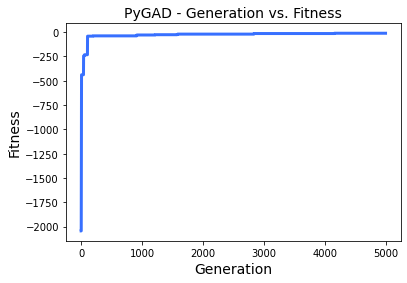

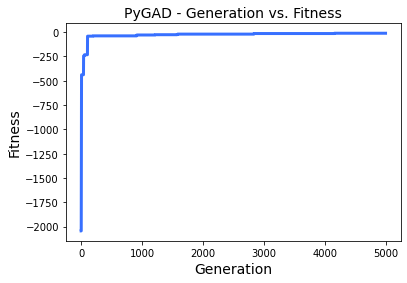

In [20]:
import time
'''
Działanie algorytmu dla przykładu 5x5_1
'''
plansza = [
    ["-","-","-","-","-"],
    ["-","1","-","-","-"],
    ["-","-","2","-","-"],
    ["-","-","1","-","-"],
    ["0","2","0","-","-"],
]

idealne = [
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,2,2,1,0],
    [0,2,1,1,0],
    [0,2,0,0,0]
]


start = time.time()
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()
end = time.time()

solution,solution_fitness,solution_idx = ga_instance.best_solution()
print(list(solution))
print("Parameters of the best solution:\n {solution}".format(solution=np.array(solution).reshape((len(plansza),len(plansza)))))
print("Fitness = {solution_fitness}".format(solution_fitness=solution_fitness))
print(porownaj_macierze(idealne,solution.reshape((len(plansza),len(plansza)))))
print("Obliczono w czasie: ", end - start, "s.")
ga_instance.plot_fitness()

<h1> 4. Badanie efektywności algorytmu genetycznego </h1>
W tym dziale zbadam czy algorytm genetyczny jest w stanie rozwiązać ten problem, oraz zbadam jego efektywność i czas działania.
Algorytm genetyczny został uruchomiony 100 razy dla każdej trudności. 
<p>
<p>
Wyniki czasowe:


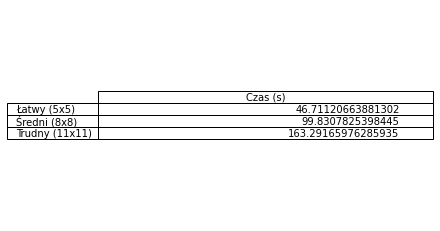

In [6]:
import matplotlib.pyplot as plt

# Dane 
categories = ['Łatwy (5x5)', 'Średni (8x8)', 'Trudny (11x11)']
values = [46.71120663881302, 99.8307825398445, 163.29165976285935]

# Wykres
fig, ax1 = plt.subplots()
ax1.bar(categories, values)
ax1.set_title('Porównanie średnich czasów obliczeń')
ax1.set_xlabel('Wielkości')
ax1.set_ylabel('Średni Czas (s)')

# Tabela
cell_text = [[str(val)] for val in values]
row_labels = categories
col_labels = ['Czas (s)']

fig, ax2 = plt.subplots()
table = ax2.table(cellText=cell_text, rowLabels=row_labels, colLabels=col_labels, loc='center')
table.auto_set_font_size(True)
ax2.axis('off')

plt.show()

Na podstawie tych wyników widać, że wraz z wzrostem trudności drastycznie wzrasta (prawie dwukrotnie). Duży czas obliczeń wynika głównie z ilości pokoleń ustawionej w tysiącach. Dodatkowym czynnikiem tak dużych wartości może byc ilość pętli i przeszukiwan w funkcji fitness.

+--------+-----------------+---------+--------------------------------+
|        | Ilość idealnych | Procent | Średnia poprawność rozwiązania |
+--------+-----------------+---------+--------------------------------+
| Łatwy  |        5        |    5%   |             74.16%             |
| Średni |        0        |    0%   |             38.49%             |
| Trudny |        0        |    0%   |             22.77%             |
+--------+-----------------+---------+--------------------------------+


Text(0.5, 0, 'Wielkości')

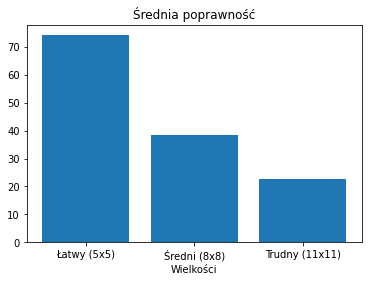

In [5]:
from prettytable import PrettyTable

row_labels = ["Łatwy", "Średni", "Trudny"]
column_labels = ["Ilość idealnych", "Procent", "Średnia poprawność rozwiązania"]
row1 = [5,"5%","74.16%"]
row2 = [0,"0%","38.49%"]
row3 = [0,"0%","22.77%"]

table = PrettyTable()
table.field_names = [""] + column_labels
table.add_row([row_labels[0]] + row1)
table.add_row([row_labels[1]] + row2)
table.add_row([row_labels[2]] + row3)

print(table)

import matplotlib.pyplot as plt

# Dane 
categories = ['Łatwy (5x5)', 'Średni (8x8)', 'Trudny (11x11)']
values = [74.16, 38.49,22.77]

# Wykres
fig, ax1 = plt.subplots()
ax1.bar(categories, values)
ax1.set_title('Średnia poprawność')
ax1.set_xlabel('Wielkości')
ax1.set_ylabel('% poprawności rozwiązania')

Jak widać na powyższej tabeli, algoytm znajduje rozwiązanie dla łatwych problemów z efektywnością 5%. Ponadto do danych jest dołączona średnia poprawność rozwiązania - była obliczana na podstawie procentowego podobienstwa najlepszego rozwiązania do idealnego. Algorytm radzi sobie na problemach łatwych, a nie daje rady z średnimi i trudnymi problemami. Powodem tego może być funkcja fitness, która nie w pełni obsługuje problem lub ilość pokoleń. 

<p>
<p>
Algorytm genetyczny jest w stanie znaleźć rozwiązanie, lecz wymaga on prawdopodobnie znacznych zmian w funkcji fitness.

<h1> 5. Bibliografia </h1>
<p> https://en.wikipedia.org/wiki/Numberlink
<p> https://numberlinks.puzzlebaron.com/
<p> https://stackoverflow.com/questions/32459925/solving-a-puzzle-using-search-algorithms
<p> https://play.google.com/store/apps/details?id=com.pinkpointer.pipeflow&hl=en_US
<p> https://game-solver.com/flow-bridges-11x11-mania-solutions/flow-bridges-11x11-mania-level-93/
<p> https://numberlink-windows-10.en.softonic.com/
<br>
<br>
<br>
<br>
<b> Autor: Karol Krawczykiewicz